<div class="alert alert-danger">
    <h4 style="font-weight: bold; font-size: 28px;">Exploratory Data Analysis of Raw Data</h4>
    <p style="font-size: 20px;">NBA API Seasons 2021-22 to 2023-24</p>
</div>

<a name="EDA"></a>

# Table of Contents

[Setup](#Setup)
  
**[1. Team Box Scores](#1.-Team-Box-Scores)**

- [1.1. Descriptives](#1.1.-Descriptives)

- [1.2. Univariate EDA](#1.2.-Univariate-EDA)

- [1.3. Multivariate EDA](#1.3.-Multivariate-EDA)

**[2. Player Box Scores](#2.-Player-Box-Scores)**

- [2.1. Descriptives](#2.1.-Descriptives)

- [2.2. Univariate EDA](#2.2.-Univariate-EDA)

- [2.3. Multivariate EDA](#2.3.-Multivariate-EDA)

# Setup

[Return to top](#EDA)

In [1]:
import sys
from pathlib import Path
# get current working directory
cwd = %pwd
# add shared_code directory to Python sys.path
sys.path.append(str(Path(cwd).parent / "shared_code"))
# import all libraries in shared_code directory 'imports.py' file
from imports import *
%matplotlib inline

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


<a name="1.-Team-Box-Scores"></a>
# 1. Team Box Scores

[Return to top](#EDA)

In [4]:
team_bs_df = pd.read_csv('../../data/original/nba_games_box_scores_2022_2024.csv')

# convert 'GAME_DATE' column to datetime
team_bs_df['GAME_DATE'] = pd.to_datetime(team_bs_df['GAME_DATE'])

<a name="1.1.-Descriptives"></a>
## 1.1. Descriptives

[Return to top](#EDA)

In [5]:
team_bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SEASON_ID          7525 non-null   int64         
 1   TEAM_ID            7525 non-null   int64         
 2   TEAM_ABBREVIATION  7525 non-null   object        
 3   TEAM_NAME          7525 non-null   object        
 4   GAME_ID            7525 non-null   int64         
 5   GAME_DATE          7525 non-null   datetime64[ns]
 6   MATCHUP            7525 non-null   object        
 7   WL                 7514 non-null   object        
 8   MIN                7525 non-null   int64         
 9   PTS                7525 non-null   int64         
 10  FGM                7525 non-null   int64         
 11  FGA                7525 non-null   int64         
 12  FG_PCT             7523 non-null   float64       
 13  FG3M               7525 non-null   int64         
 14  FG3A    

In [6]:
team_bs_df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,12021,1610612737,ATL,Atlanta Hawks,12100004,2021-10-04,ATL @ MIA,L,240,99,34,85,0.400,9,38.0,0.237,22,24,0.917,7.0,26.0,33.0,19,10.0,3,15,23,-26.0
1,12021,1610612737,ATL,Atlanta Hawks,12100016,2021-10-06,ATL vs. CLE,L,240,96,36,91,0.396,11,27.0,0.407,13,17,0.765,12.0,33.0,45.0,27,11.0,5,19,26,-3.0
2,12021,1610612737,ATL,Atlanta Hawks,12100034,2021-10-09,ATL @ MEM,W,239,91,33,85,0.388,12,30.0,0.400,13,16,0.813,5.0,47.0,52.0,22,9.0,4,16,14,4.0
3,12021,1610612737,ATL,Atlanta Hawks,12100055,2021-10-14,ATL vs. MIA,W,236,127,49,101,0.485,19,46.0,0.413,10,13,0.769,13.0,38.0,51.0,33,10.0,8,11,17,35.0
4,22021,1610612737,ATL,Atlanta Hawks,22100014,2021-10-21,ATL vs. DAL,W,242,113,45,94,0.479,15,35.0,0.429,8,9,0.889,6.0,49.0,55.0,31,8.0,9,13,16,26.0


In [7]:
team_bs_df.describe()

,SEASON_ID,TEAM_ID,GAME_ID,GAME_DATE,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
count,7525.000,7.525e+03,7.525e+03,7525,7525.000,7525.000,7525.000,7525.000,7523.000,7525.000,7525.000,7523.000,7525.000,7525.000,7521.000,7525.000,7525.000,7525.000,7525.000,7525.000,7525.000,7525.000,7525.000,7525.000
mean,22498.946,1.611e+09,9.292e+07,2022-11-11 18:06:21.767441920,239.338,111.652,40.839,87.558,0.467,12.320,34.612,0.355,17.653,22.736,0.777,10.433,33.245,43.678,24.895,7.548,4.842,13.419,19.916,0.055
min,12021.000,1.611e+09,1.210e+07,2021-10-03 00:00:00,-1.000,0.000,0.000,0.000,0.274,0.000,0.000,0.000,0.000,0.000,0.300,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-73.000
25%,22021.000,1.611e+09,2.210e+07,2022-02-16 00:00:00,239.000,103.000,37.000,83.000,0.429,10.000,30.000,0.297,14.000,18.000,0.714,8.000,30.000,39.000,21.000,5.000,3.000,11.000,17.000,-9.400
50%,22022.000,1.611e+09,2.220e+07,2022-12-03 00:00:00,240.000,112.000,41.000,88.000,0.467,12.000,34.000,0.353,17.000,22.000,0.783,10.000,33.000,44.000,25.000,7.000,5.000,13.000,20.000,0.000
75%,22023.000,1.611e+09,2.230e+07,2023-04-28 00:00:00,241.000,121.000,45.000,92.000,0.506,15.000,39.000,0.412,21.000,27.000,0.846,13.000,37.000,48.000,28.000,9.000,6.000,16.000,23.000,10.000
max,62023.000,1.611e+09,1.622e+09,2024-02-04 00:00:00,316.000,176.000,65.000,121.000,0.687,27.000,69.000,0.645,44.000,52.000,1.000,29.000,60.000,73.000,50.000,22.000,19.000,30.000,39.000,73.000
std,5160.639,8.631e+00,3.164e+08,NaN,13.368,13.928,5.746,8.151,0.056,3.892,6.971,0.084,5.853,7.039,0.101,3.894,5.616,6.896,5.247,2.938,2.481,3.931,4.204,14.924


In [8]:
# missing values table
utl.get_missing_values(team_bs_df)

,Missing Values,% of Total Values
WL,11,0.1
FT_PCT,4,0.1
FG_PCT,2,0.0
FG3_PCT,2,0.0


<a name="1.2.-Univariate-EDA"></a>
## 1.2. Univariate EDA

[Return to top](#EDA)

In [9]:
# take a look at the Celtics in 2022 season
team_bs_2022 = team_bs_df[team_bs_df['SEASON_ID'] == 22022]
BC_2022 = team_bs_2022[team_bs_2022['TEAM_NAME'] == 'Boston Celtics']
print(BC_2022.shape)
BC_2022.head()

(87, 28)


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
361,22022,1610612738,BOS,Boston Celtics,1522200012,2022-07-09,BOS @ MIA,L,201,78,23,65,0.354,11,35.0,0.314,21,23,0.913,5.0,28.0,33.0,19,5.0,6,18,25,-6.4
362,22022,1610612738,BOS,Boston Celtics,1522200028,2022-07-11,BOS vs. MIL,W,201,111,35,74,0.473,19,46.0,0.413,22,26,0.846,12.0,26.0,38.0,23,8.0,8,17,29,-1.0
363,22022,1610612738,BOS,Boston Celtics,1522200035,2022-07-12,BOS @ GSW,W,199,103,37,82,0.451,13,30.0,0.433,16,22,0.727,14.0,25.0,39.0,24,5.0,5,15,17,16.2
364,22022,1610612738,BOS,Boston Celtics,1522200047,2022-07-14,BOS vs. MEM,W,201,108,39,78,0.500,13,36.0,0.361,17,23,0.739,9.0,28.0,37.0,27,10.0,4,17,22,18.2
365,22022,1610612738,BOS,Boston Celtics,1522200066,2022-07-16,BOS vs. BKN,L,200,95,37,87,0.425,11,34.0,0.324,10,11,0.909,12.0,28.0,40.0,23,6.0,5,11,19,-1.6


In [10]:
# get numeric variables
num_vars_team_bs = team_bs_df.select_dtypes(include=['int64', 'float64']).columns
# filter out columns that end with '_ID'
num_vars_team_bs = [col for col in num_vars_team_bs if not col.endswith('_ID')]
print('Number of numeric variables:', len(num_vars_team_bs))

Number of numeric variables: 20


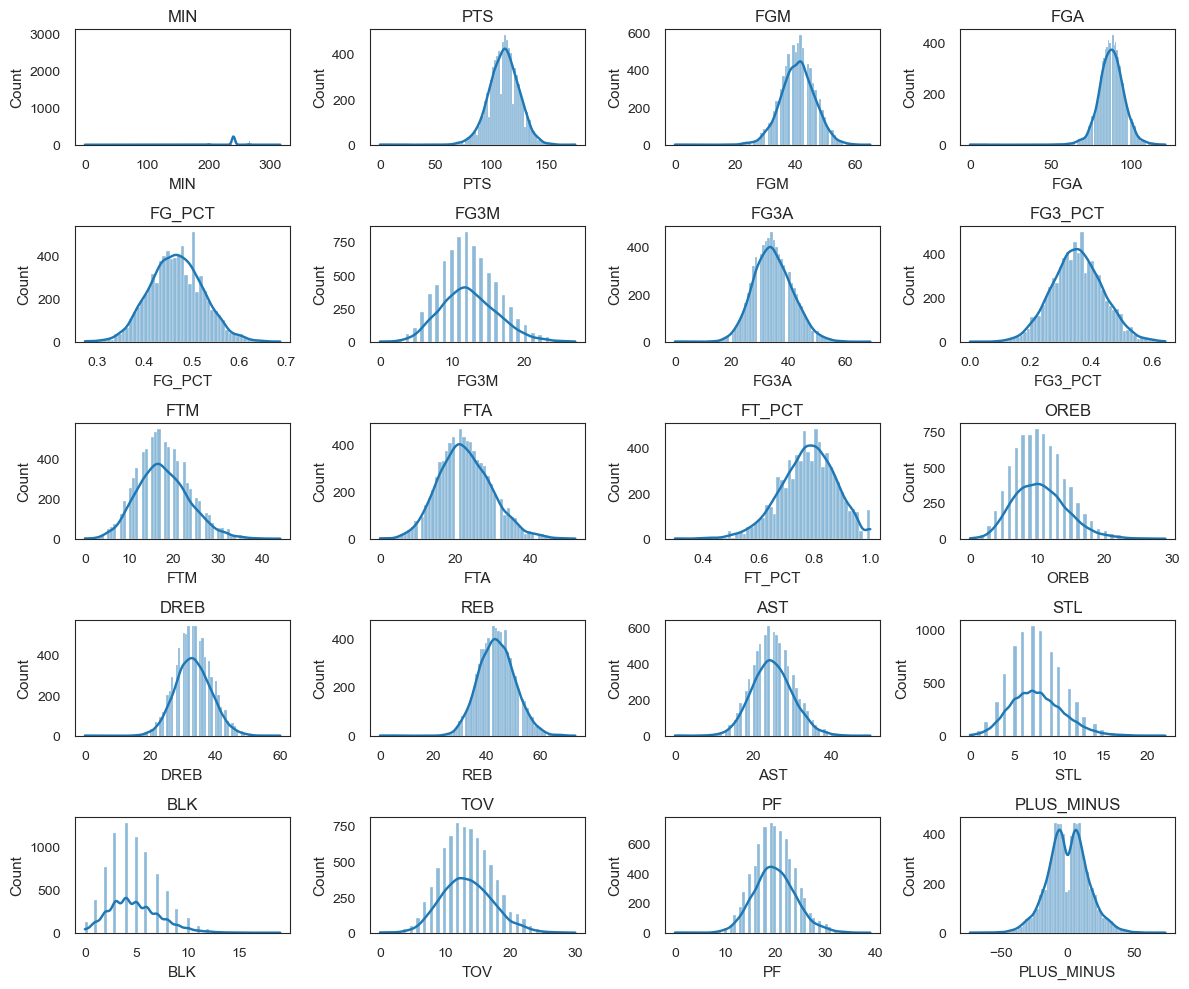

In [11]:
# histograms for each numeric column
fig, axes = plt.subplots(5, 4, figsize=(12, 10))
for ax, column in zip(axes.flatten(), num_vars_team_bs):
    sns.histplot(team_bs_df[column], kde=True, ax=ax) 
    ax.set_title(f'{column}')
plt.tight_layout();

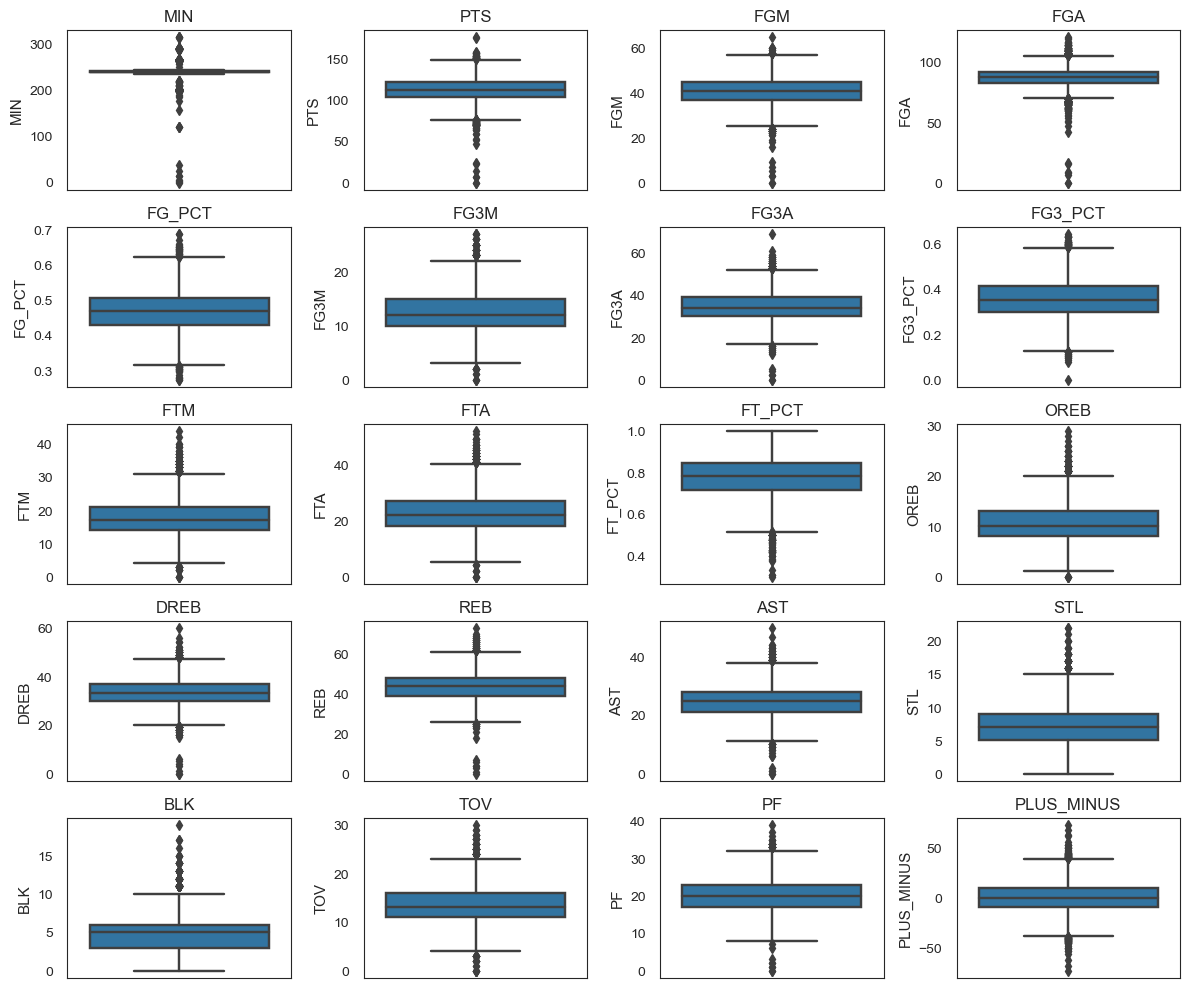

In [12]:
# boxplots for each numeric column
fig, axes = plt.subplots(5, 4, figsize=(12, 10))
for ax, column in zip(axes.flatten(), num_vars_team_bs):
    sns.boxplot(y=column, data=team_bs_df, ax=ax)
    ax.set_title(f'{column}')
plt.tight_layout();

<a name="1.3.-Multivariate-EDA"></a>
## 1.3. Multivariate EDA

[Return to top](#EDA)

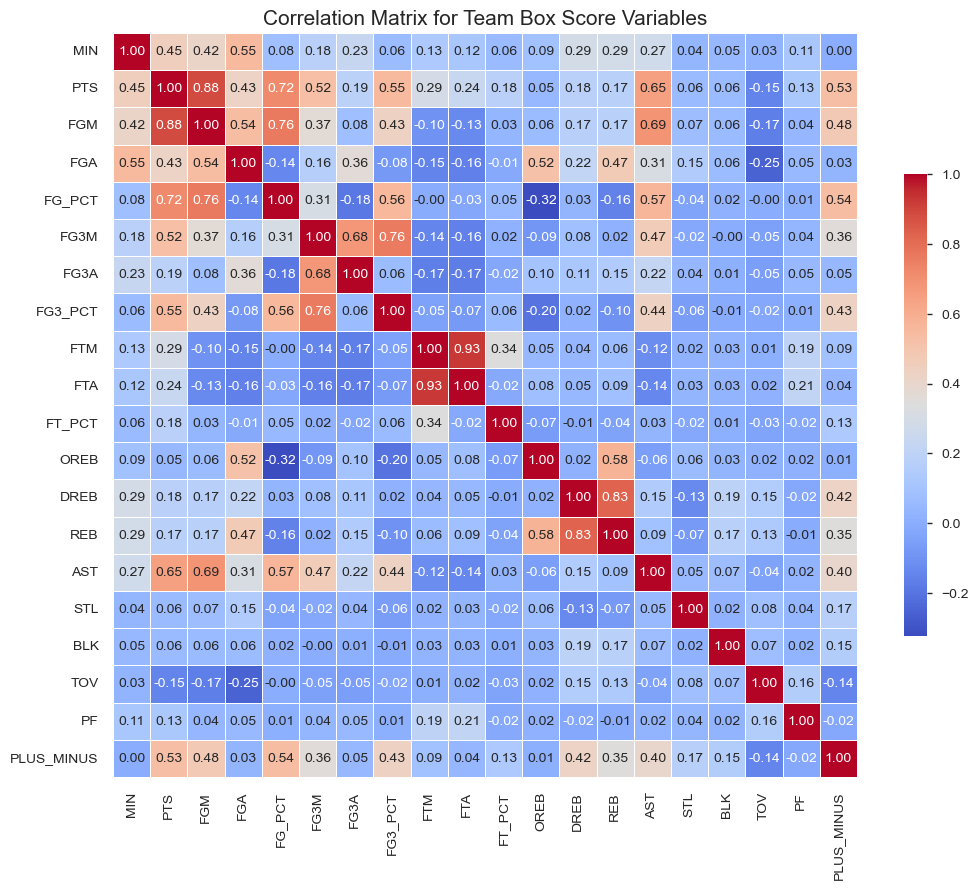

In [13]:
# correlations
plt.figure(figsize=(12, 12))
sns.heatmap(team_bs_df[num_vars_team_bs].corr(), annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for Team Box Score Variables', fontsize=15);

<a name="2.-Player-Box-Scores"></a>
# 2. Player Box Scores

[Return to top](#EDA)

In [14]:
player_bs_df = pd.read_csv('../../data/original/nba_players_statistics_1946_2024.csv')

# filter to include only last three seasons
seasons_to_keep = ['2021-22', '2022-23', '2023-24']
player_bs_df = player_bs_df[player_bs_df['SEASON_ID'].isin(seasons_to_keep)]

<a name="2.1.-Descriptives"></a>
## 2.1. Descriptives

[Return to top](#EDA)

In [13]:
player_bs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2056 entries, 92 to 29744
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_ID          2056 non-null   int64  
 1   SEASON_ID          2056 non-null   object 
 2   LEAGUE_ID          2056 non-null   int64  
 3   TEAM_ID            2056 non-null   int64  
 4   TEAM_ABBREVIATION  2056 non-null   object 
 5   PLAYER_AGE         2056 non-null   float64
 6   GP                 2056 non-null   int64  
 7   GS                 2056 non-null   float64
 8   MIN                2056 non-null   float64
 9   FGM                2056 non-null   int64  
 10  FGA                2056 non-null   int64  
 11  FG_PCT             2056 non-null   float64
 12  FG3M               2056 non-null   float64
 13  FG3A               2056 non-null   float64
 14  FG3_PCT            2056 non-null   float64
 15  FTM                2056 non-null   int64  
 16  FTA                2056 non

In [14]:
player_bs_df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
92,1630173,2021-22,0,1610612761,TOR,22.0,73,28.0,1725.0,265,603,0.439,56.0,156.0,0.359,78,131,0.595,146.0,327.0,473.0,82,37.0,41.0,84.0,151,664
93,1630173,2022-23,0,1610612761,TOR,23.0,55,12.0,1141.0,196,404,0.485,29.0,108.0,0.269,87,124,0.702,100.0,228.0,328.0,50,31.0,30.0,59.0,102,508
94,1630173,2023-24,0,1610612761,TOR,24.0,25,0.0,437.0,78,170,0.459,13.0,47.0,0.277,24,42,0.571,50.0,86.0,136.0,44,16.0,12.0,29.0,40,193
95,1630173,2023-24,0,1610612752,NYK,24.0,11,0.0,142.0,21,37,0.568,1.0,5.0,0.200,3,4,0.750,20.0,26.0,46.0,3,3.0,7.0,9.0,17,46
96,1630173,2023-24,0,0,TOT,24.0,36,0.0,579.0,99,207,0.478,14.0,52.0,0.269,27,46,0.587,70.0,112.0,182.0,47,19.0,19.0,38.0,57,239


In [15]:
player_bs_df.describe()

,PLAYER_ID,LEAGUE_ID,TEAM_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
count,2.056e+03,2056.0,2.056e+03,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000,2056.000
mean,1.277e+06,0.0,1.464e+09,26.318,35.694,16.390,804.821,137.259,293.145,0.444,41.658,116.121,0.296,58.591,75.201,0.680,34.769,111.093,145.862,84.303,24.823,15.810,43.923,65.967,374.768
std,6.173e+05,0.0,4.632e+08,4.266,23.855,22.695,730.379,149.780,314.675,0.137,51.625,137.791,0.159,82.422,101.880,0.263,43.609,119.232,156.874,108.224,25.012,21.566,49.810,58.332,415.101
min,2.207e+03,0.0,0.000e+00,19.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.626e+06,0.0,1.611e+09,23.000,15.000,0.000,160.000,18.000,44.000,0.400,2.000,9.000,0.250,5.000,8.000,0.633,5.750,19.000,25.000,10.000,4.000,2.000,7.000,15.000,49.000
50%,1.629e+06,0.0,1.611e+09,25.000,35.000,4.000,611.500,84.000,183.500,0.450,21.000,63.000,0.333,27.000,38.500,0.752,20.000,75.000,100.000,44.000,17.000,9.000,28.000,53.000,228.500
75%,1.630e+06,0.0,1.611e+09,29.000,56.000,27.000,1254.000,208.000,444.250,0.500,63.000,180.000,0.383,78.000,100.000,0.837,46.000,165.000,210.500,113.000,37.250,21.000,62.000,102.000,563.000
max,1.642e+06,0.0,1.611e+09,43.000,83.000,83.000,2963.000,774.000,1564.000,1.000,301.000,750.000,1.000,669.000,803.000,1.000,349.000,813.000,1019.000,741.000,138.000,193.000,303.000,286.000,2225.000


In [16]:
# missing values table
utl.get_missing_values(player_bs_df)

,Missing Values,% of Total Values


<a name="2.2.-Univariate-EDA"></a>
## 2.2. Univariate EDA

[Return to top](#EDA)

In [17]:
# get numeric variables
num_vars_player_bs = player_bs_df.select_dtypes(include=['int64', 'float64']).columns
# filter out columns that end with '_ID'
num_vars_player_bs = [col for col in num_vars_player_bs if not col.endswith('_ID')]
print('Number of numeric variables:', len(num_vars_player_bs))

Number of numeric variables: 22


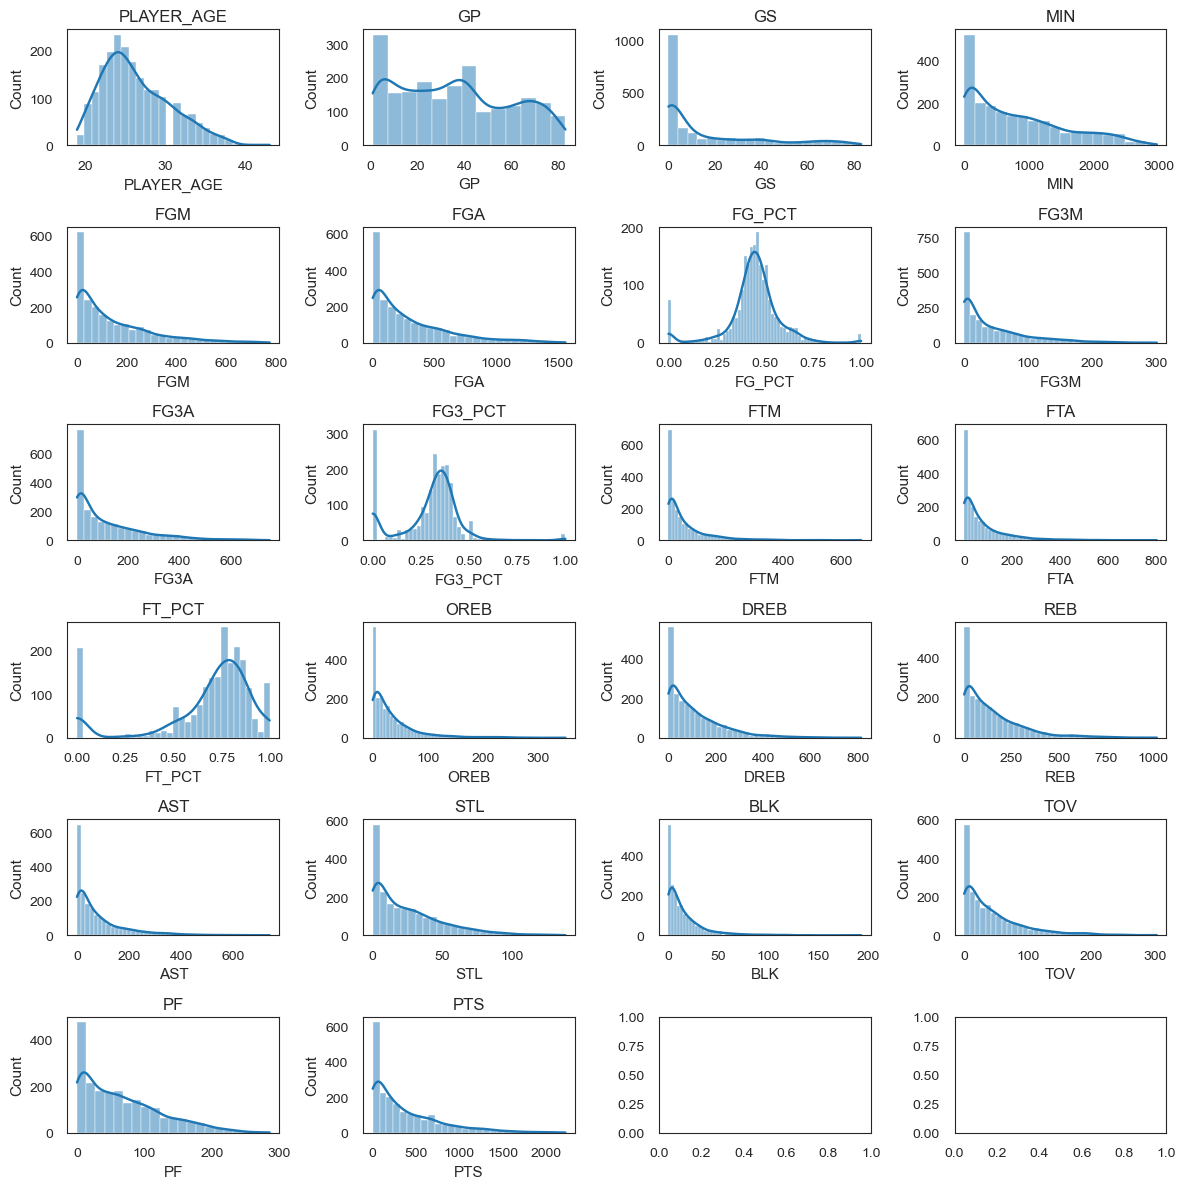

In [18]:
# histograms for each numeric column
fig, axes = plt.subplots(6, 4, figsize=(12, 12))
for ax, column in zip(axes.flatten(), num_vars_player_bs):
    sns.histplot(player_bs_df[column], kde=True, ax=ax) 
    ax.set_title(f'{column}')
plt.tight_layout();

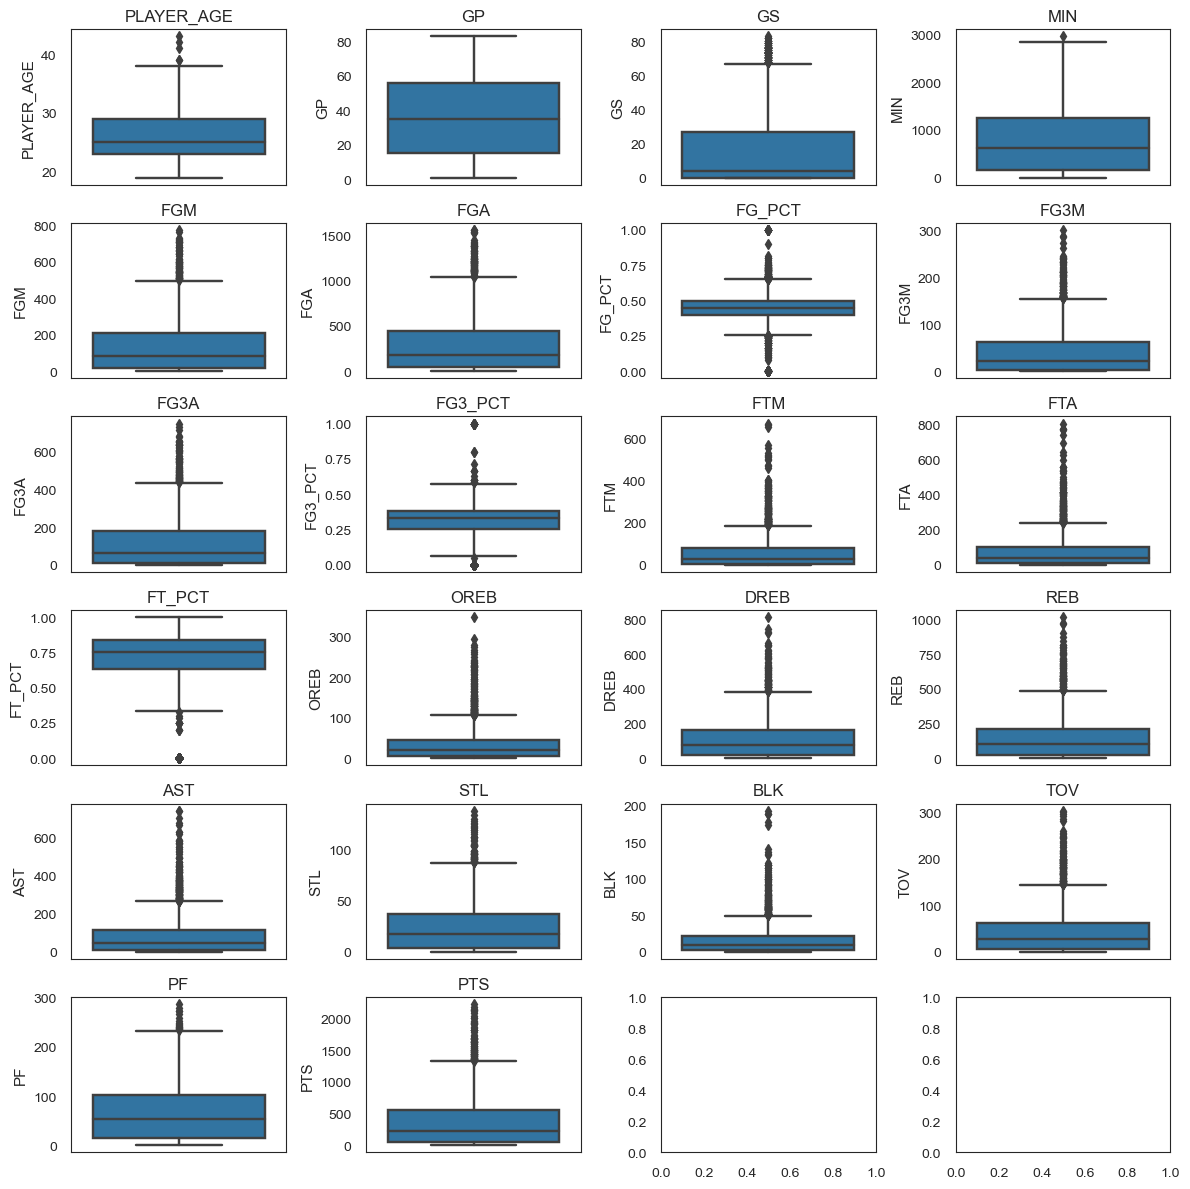

In [19]:
# boxplots for each numeric column
fig, axes = plt.subplots(6, 4, figsize=(12, 12))
for ax, column in zip(axes.flatten(), num_vars_player_bs):
    sns.boxplot(y=column, data=player_bs_df, ax=ax)
    ax.set_title(f'{column}')
plt.tight_layout();

<a name="2.3.-Multivariate-EDA"></a>
## 2.3. Multivariate EDA

[Return to top](#EDA)

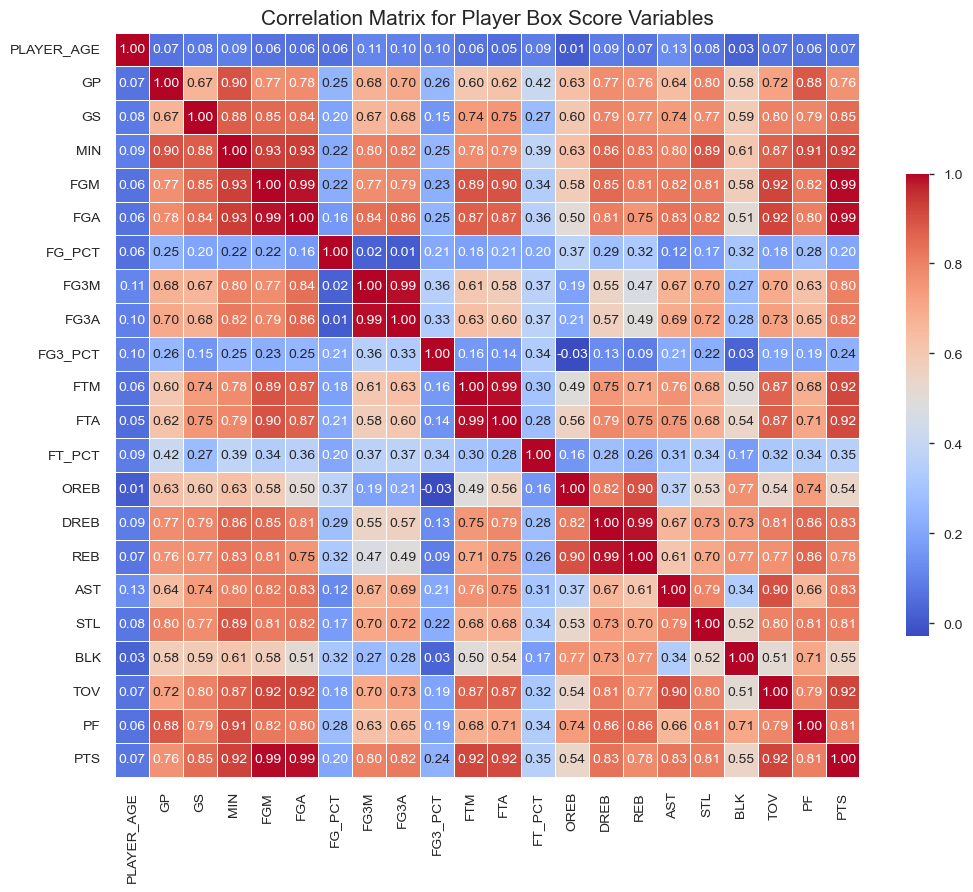

In [20]:
# correlations
plt.figure(figsize=(12, 12))
sns.heatmap(player_bs_df[num_vars_player_bs].corr(), annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for Player Box Score Variables', fontsize=15);